In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [150]:
data = pd.read_excel('Reference_Value.xlsx')
#data = data.reset_index()
data = data.dropna()

In [151]:
len(data)

25

In [104]:
#train_X = np.array(data[:idx])
#test_X = np.array(data[idx:])
train_X, test_X = train_test_split(data, test_size=0.20)
train_X = np.array(train_X)
test_X = np.array(test_X)
print(train_X)

[[ 7314.9921875  13305.8671875     28.53672028 ...  7314.9921875
    807.27856445    69.75360107]
 [ 7664.91210938 13244.83105469    27.2242527  ...  7664.91210938
    801.26647949    69.22927094]
 [ 7402.57861328 12558.17480469    28.60273933 ...  7402.57861328
    800.28991699    66.34085846]
 ...
 [ 7542.50390625 13336.38476562    28.53311348 ...  7542.50390625
    806.40881348    73.78032684]
 [ 7367.54394531 13305.8671875     28.51535797 ...  7367.54394531
    805.88995361    72.9311142 ]
 [ 7612.57324219 12497.13867188    28.83542824 ...  7612.57324219
    802.5635376     56.86185455]]


In [145]:
params = {
    'n_estimators': 2000,
    'max_depth': 10,
    'min_samples_split': 2,
    'learning_rate': 0.001, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

In [146]:
y_train = []
X_train = []
for i in range(len(train_X)):
    y_train.append(train_X[i][0])
    X_train.append(train_X[i][1:])
y_test = []
X_test = []
for i in range(len(test_X)):
    y_test.append(test_X[i][0])
    X_test.append(test_X[i][1:])

In [147]:
clf.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.001, loss='ls', max_depth=10,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=2000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

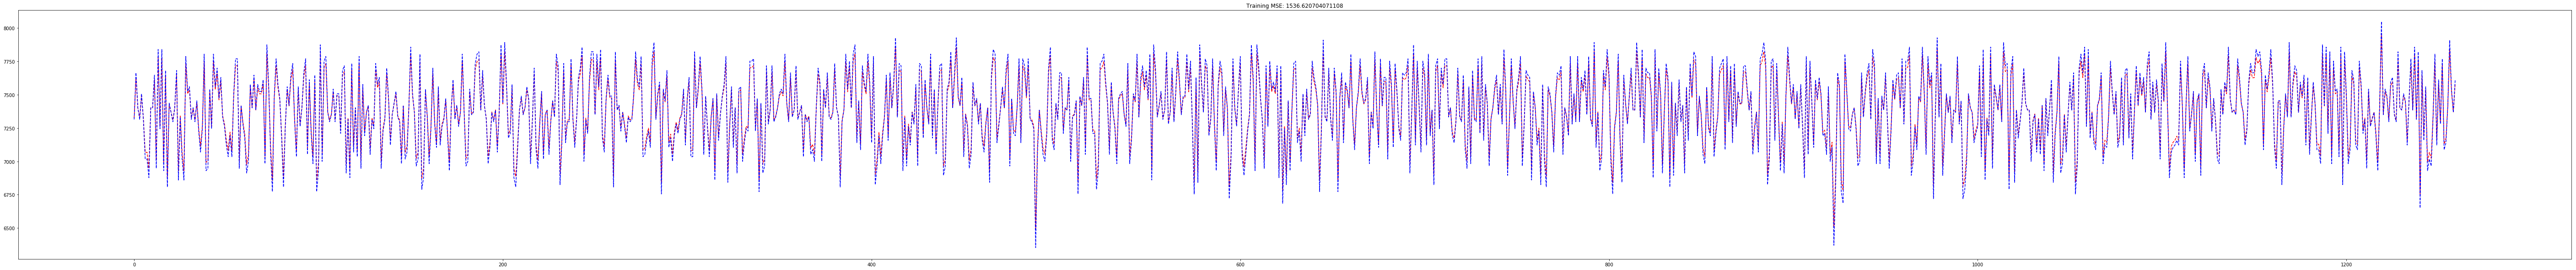

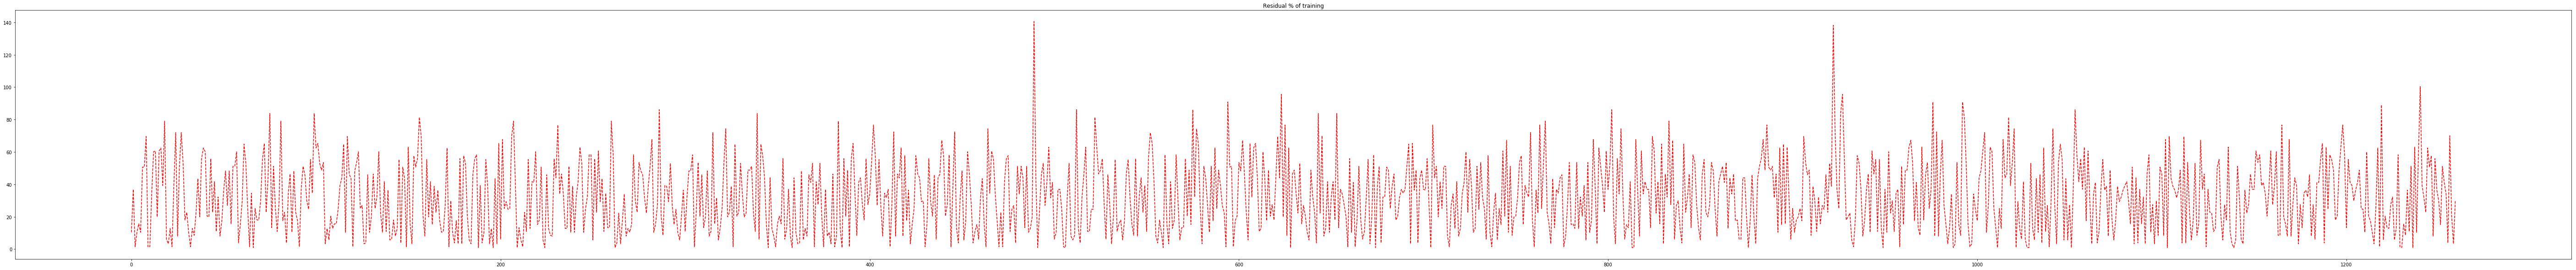

In [148]:
plt.figure(figsize=(100,10))
plt.title('Training MSE: {}'.format(mean_squared_error(y_train, clf.predict(X_train))))
plt.plot(range(len(y_train)), clf.predict(X_train), 'r--', range(len(y_train)), y_train, 'b--')
plt.savefig('train.png')

residual = abs(clf.predict(X_train)-y_train)
residualPercent = (residual*100)/(max(y_train) - min(y_train))
plt.figure(figsize=(100,10))
plt.title('Residual % of training')
plt.plot(range(len(y_train)), residual,'r--')
plt.savefig('residualPercentTrain.png')

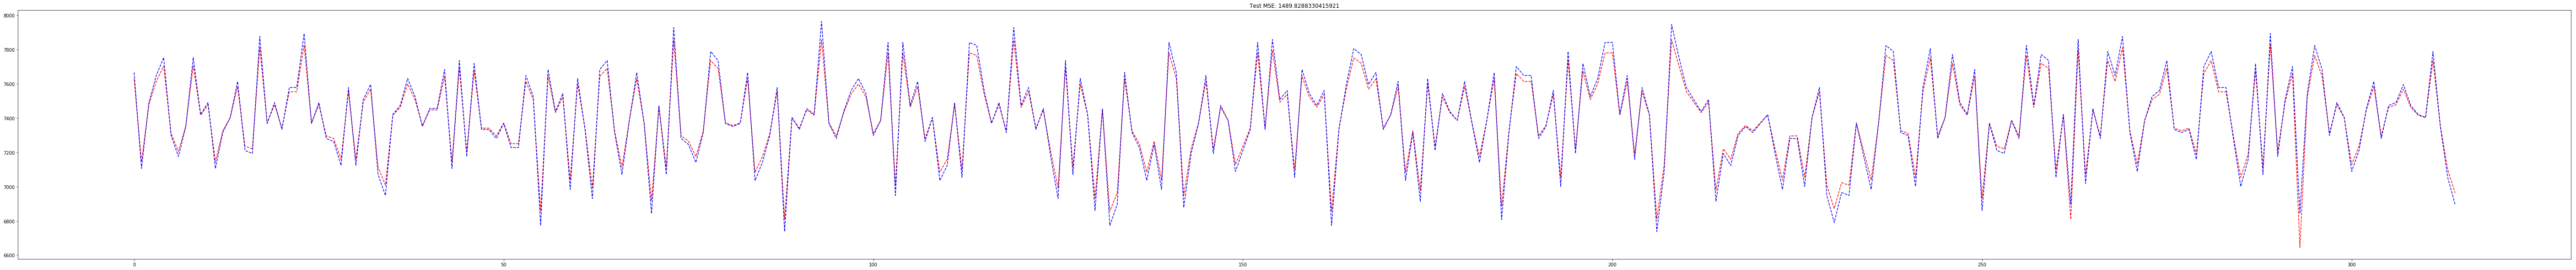

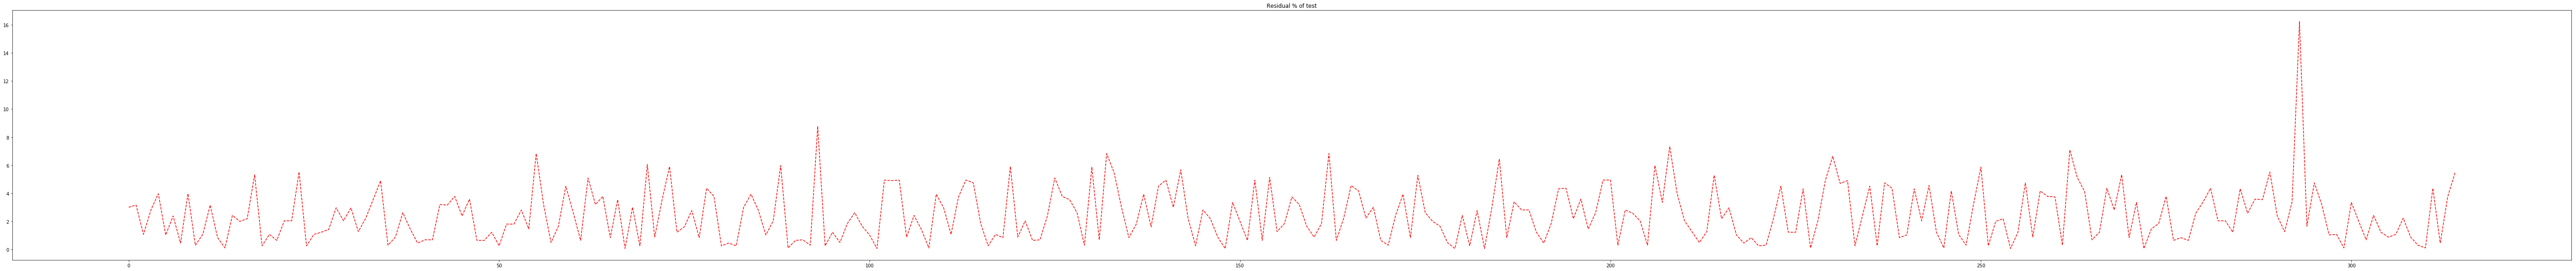

In [149]:
plt.figure(figsize=(100,10))
plt.title('Test MSE: {}'.format(mean_squared_error(y_test, clf.predict(X_test))))
plt.plot(range(len(y_test)), clf.predict(X_test), 'r--', range(len(y_test)), y_test, 'b--')
plt.savefig('test.png')

residual = abs(clf.predict(X_test)-y_test)
residualPercent = (residual*100)/(max(y_test) - min(y_test))
plt.figure(figsize=(100,10))
plt.title('Residual % of test')
plt.plot(range(len(y_test)), residualPercent,'r--')
plt.savefig('residualPercentTest.png')

In [91]:
a=clf.predict(X_test)
b=y_test

In [97]:
a

array([ 61.99790441,  64.42226534,  64.45500736, ...,  59.83371025,
        60.89940527,  76.30340174])

In [98]:
np.array(y_test)

array([ 61.7821579 ,  63.10957718,  65.54057312, ...,  57.83309174,
        59.13694382,  69.80417633])

In [100]:
c = abs(a-b)

In [101]:
c

array([ 0.21574651,  1.31268816,  1.08556576, ...,  2.00061852,
        1.76246146,  6.4992254 ])

In [102]:
c*100

array([  21.57465071,  131.26881574,  108.55657585, ...,  200.06185171,
        176.24614551,  649.92254045])

In [103]:
max(b)

79.183059692382813

In [104]:
min(b)

0.0

In [105]:
(c*100)/(max(b)-min(b))

array([ 0.27246548,  1.65778913,  1.37095707, ...,  2.5265739 ,
        2.2258062 ,  8.20784828])